<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# ES1
#### Alumno: Matias Pardo Errecarret

## Consigna:
<img src="./consigna.png" align="center"  />

In [20]:
from IPython.display import IFrame
IFrame("./ResolucionAnalitica.pdf", width=900, height=1000)

In [37]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 11 10:52:56 2022

@author: mariano
"""

import sympy as sp
from sympy.abc import s #importamos simbolo s
from IPython.display import display, Math

#Declaro simbolos variables
V1, V2, Vx = sp.symbols("V1, V2, Vx")
G1, G2, Y1, Y2, R3, C = sp.symbols("G1, G2, Y1, Y2, R3, C")

aa = sp.solve([ Vx*(Y1+Y2)-V1*Y1, 
                Vx*(G1+G2) -V1*G1 -V2*G2], 
                [V1, V2])

transf_func = aa[V2]/aa[V1]


# Ejercicio 7.a: Pasatodo de 1er orden

tf7a = transf_func.subs(Y1, s*C)
tf7a = tf7a.subs(Y2, 1/R3)

#expand: Expande 
num, den = sp.fraction(sp.simplify(sp.expand(tf7a)))

num = sp.Poly(num,s)
den = sp.Poly(den,s)

#Obtengo coeficiente de mayor grado del Num y Den LC()
#Lo divido para obtener el coeficiente externo
k = num.LC() / den.LC()

num = num.monic()
den = den.monic()

tf7a_final = sp.Mul(k,num/den, evaluate=True)

print('')
print('################')
print('# Ejercicio 7a #')
print('################')
display(tf7a_final)



################
# Ejercicio 7a #
################


(s - G1/(C*G2*R3))/(s + 1/(C*R3))

### Normalizacion


In [38]:
tf7a = tf7a.subs(C, 1)
tf7a = tf7a.subs(R3, 1)

num, den = sp.fraction(sp.simplify(sp.expand(tf7a)))

num = sp.Poly(num,s)
den = sp.Poly(den,s)

#Obtengo coeficiente de mayor grado del Num y Den LC()
#Lo divido para obtener el coeficiente externo
k = num.LC() / den.LC()

num = num.monic()
den = den.monic()

tf7a_final = sp.Mul(k,num/den, evaluate=True)

print('')
print('################')
print('# Ejercicio 7a #')
print('################')
display(tf7a_final)


################
# Ejercicio 7a #
################


(-G1/G2 + s)/(s + 1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

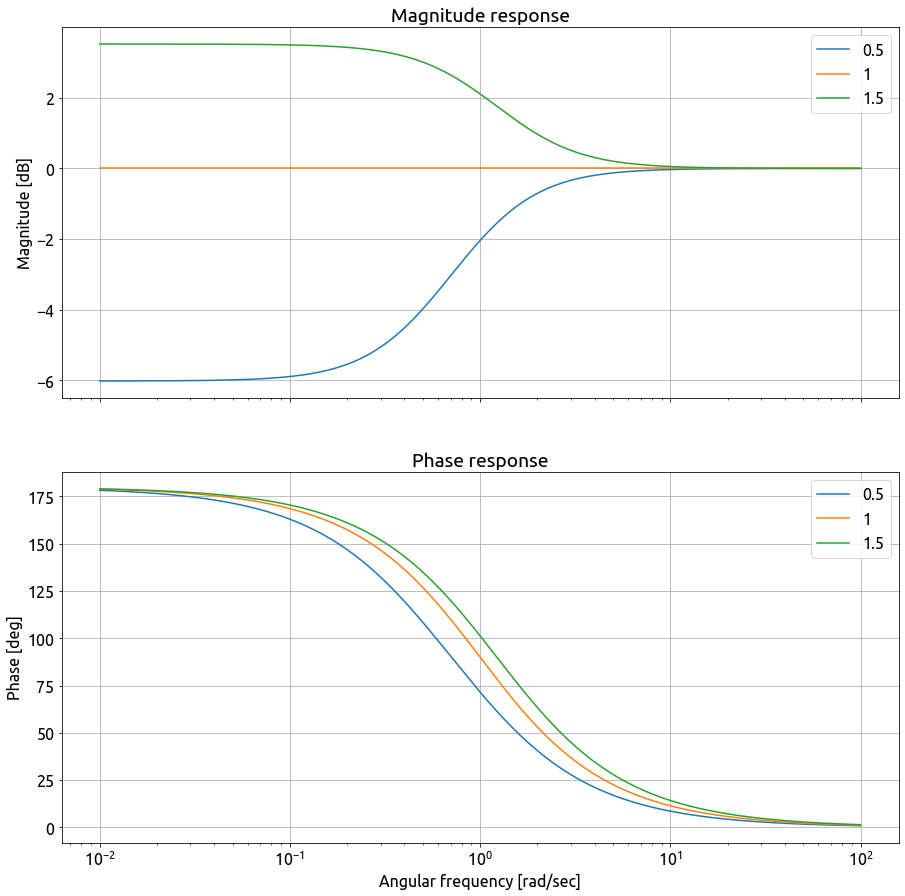

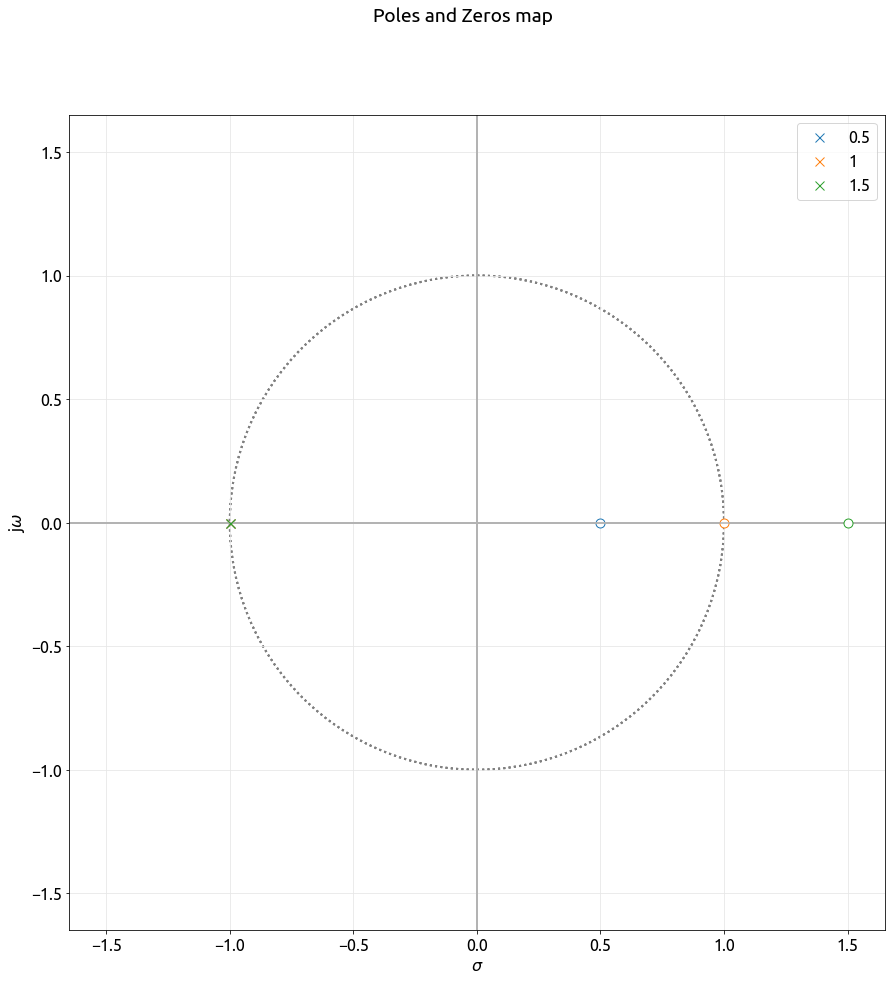

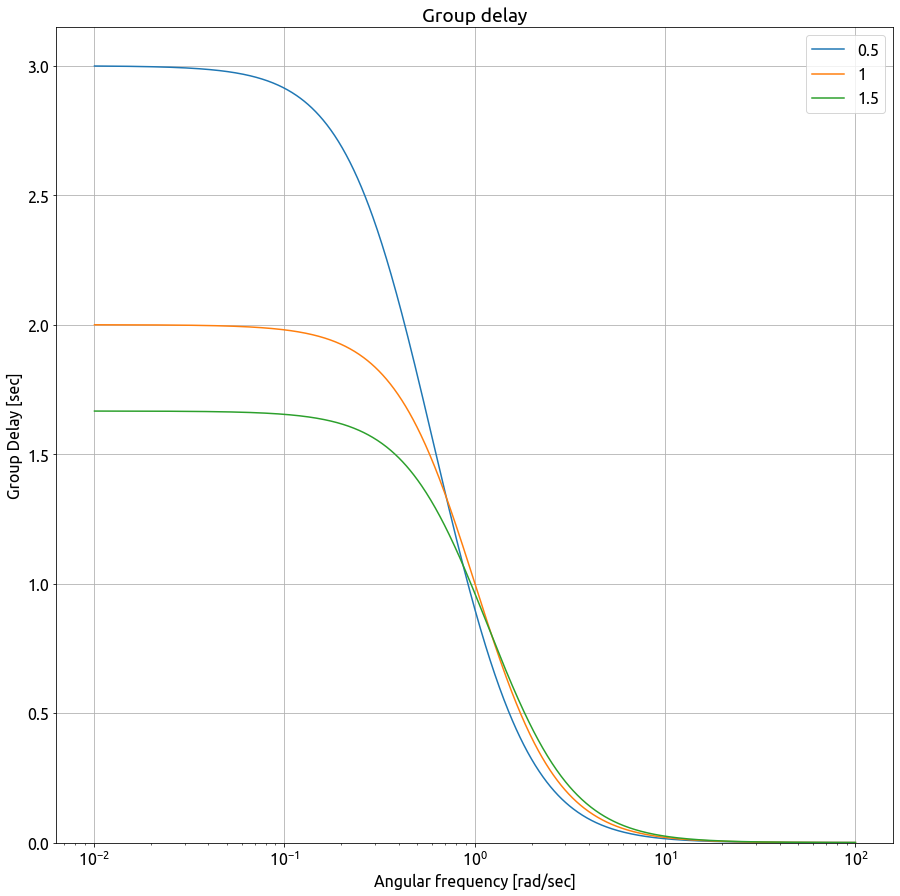

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from splane import analyze_sys, pretty_print_lti

#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (15,15)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})


# parametrización de wo o Q.
all_sos = []

wo = 1

#G1/G2 Var
G1_div_G2 = [0.5,1,1.5]

for ii in G1_div_G2:
    
    num = np.array([1,-1*ii]) 
    den = np.array([1, wo])
    
    

    mi_sos = sig.TransferFunction(num,den)
    
    pretty_print_lti(mi_sos)
    
    all_sos += [mi_sos]
    
#plt.close('all')
analyze_sys(all_sos, sys_name=G1_div_G2)